In [1]:
import numpy as np

In [2]:
import modules.experiment.events as expevents
import modules.experiment.fov as expfov
import modules.eas_reconstruction as eas

import modules.plots.eas as easplots

from modules_reloader import reloader

relmod = reloader(expevents, eas, expfov, easplots)

In [3]:
relmod()

In [4]:
processor = expevents.EventProcessor(N=45, verbosity=3, load_rir=False, min_signal_significance=4.0)
L = 10
N = processor.N

In [5]:
event_id = 10675
event = expevents.Event(event_id)

In [6]:
x_fov, y_fov, t_means, t_stds = processor.get_arrival_times(event)

In [7]:
print(f'{len(x_fov)} points')

45 points


In [8]:
popt, perr, in_fit_mask = eas.adaptive_excluding_fit(
    x_fov, y_fov, t_means, t_stds, acceptable_angle_between=0.1, absolute_distance_exclusion=True
)

print(f'{np.sum(in_fit_mask)} points left in fit')

35 points left in fit


In [9]:
print(f'theta = {popt[0]} +/- {perr[0]}')
print(f'phi = {popt[1]} +/- {perr[1]}')

theta = 0.63916161625856 +/- 0.03548389352334039
phi = 3.027902847770866 +/- 0.09163213768649843


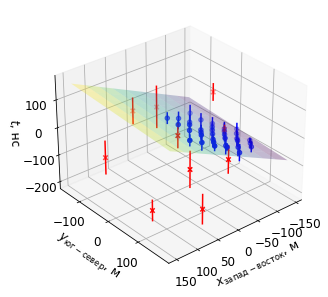

In [10]:
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from modules.plots._shared import Figsize, _save_or_show


n_grid = 10
extension_factor = 1.1
x_lims = np.array([x_fov.min(), x_fov.max()])
x_plane = np.linspace(*(x_lims.mean() + extension_factor * (x_lims - x_lims.mean())), n_grid)
y_lims = np.array([y_fov.min(), y_fov.max()])
y_plane = np.linspace(*(y_lims.mean() + extension_factor * (y_lims - y_lims.mean())), n_grid)
xx_plane, yy_plane = np.meshgrid(x_plane, y_plane)
z_plane = eas.arrival_time_plane(
    np.concatenate((xx_plane.reshape(xx_plane.size, 1), yy_plane.reshape(yy_plane.size, 1)), axis=1),
    *popt
).reshape(xx_plane.shape)


fig = plt.figure(figsize=Figsize.NORMAL.value)
ax = fig.add_subplot(111, projection='3d')

easplots.plot_scatter_with_errorbars(
    ax, x_fov, y_fov, t_means, t_stds,
    masks=[in_fit_mask, np.logical_not(in_fit_mask)],
    markers=['o', 'x'],
    colors=['b', 'r'],
    ylabel='$t$, нс',
)

surf = ax.plot_surface(xx_plane, yy_plane, z_plane, cmap='viridis', alpha=0.3)

# # plt.savefig('test.png')